In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
PAMAP_PARQUET  = '../../data/features/pamapv1.parquet'
pamap = pd.read_parquet(PAMAP_PARQUET)
pamap.head()

,0,54,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
0,109,1970-01-01 00:00:31,24,139.0,24.910937,-8.774862,2.921167,2.307146,-8.836571,2.969285,...,0.025054,0.072855,0.327494,-44.677669,-7.026946,3.250370,0.555624,-0.316755,0.718974,-0.268680
1,109,1970-01-01 00:00:32,24,138.0,24.937500,-8.884371,3.639173,2.511493,-8.938693,3.706951,...,0.004657,-0.017115,0.011002,-45.354818,-3.942657,2.595037,0.544582,-0.304127,0.717182,-0.310576
2,109,1970-01-01 00:00:33,24,138.0,24.901250,-7.953692,4.918869,1.920328,-8.051530,4.957867,...,0.251467,-0.058381,-0.167615,-44.676414,-7.139982,3.829399,0.530612,-0.356835,0.695447,-0.324372
3,109,1970-01-01 00:00:34,24,138.0,24.937500,-6.550635,10.524657,0.379089,-6.833505,10.539075,...,-0.264943,-0.043607,0.077041,-41.828461,-15.475105,9.590448,0.485194,-0.476597,0.661950,-0.308362
4,109,1970-01-01 00:00:35,24,138.0,24.937500,-2.638427,8.896337,-2.473392,-2.795023,9.151476,...,0.260470,-0.071397,-0.150778,-39.629503,-19.076338,12.213491,0.469625,-0.529871,0.628705,-0.304908


In [5]:
cluster_mapping = {
    0: [1, 2, 3, 4], # Relaxation
    1: [10, 11], # Focus
    2: [5,6,20,24] # Physical
}

pamap['cluster'] = pamap[1].map({value: key for key, values in cluster_mapping.items() for value in values})
pamap = pamap[pamap[1] != 9]
pamap['cluster'] = pamap['cluster'].astype(int)
pamap.head()

,0,54,1,2,3,4,5,6,7,8,...,45,46,47,48,49,50,51,52,53,cluster
0,109,1970-01-01 00:00:31,24,139.0,24.910937,-8.774862,2.921167,2.307146,-8.836571,2.969285,...,0.072855,0.327494,-44.677669,-7.026946,3.250370,0.555624,-0.316755,0.718974,-0.268680,2.0
1,109,1970-01-01 00:00:32,24,138.0,24.937500,-8.884371,3.639173,2.511493,-8.938693,3.706951,...,-0.017115,0.011002,-45.354818,-3.942657,2.595037,0.544582,-0.304127,0.717182,-0.310576,2.0
2,109,1970-01-01 00:00:33,24,138.0,24.901250,-7.953692,4.918869,1.920328,-8.051530,4.957867,...,-0.058381,-0.167615,-44.676414,-7.139982,3.829399,0.530612,-0.356835,0.695447,-0.324372,2.0
3,109,1970-01-01 00:00:34,24,138.0,24.937500,-6.550635,10.524657,0.379089,-6.833505,10.539075,...,-0.043607,0.077041,-41.828461,-15.475105,9.590448,0.485194,-0.476597,0.661950,-0.308362,2.0
4,109,1970-01-01 00:00:35,24,138.0,24.937500,-2.638427,8.896337,-2.473392,-2.795023,9.151476,...,-0.071397,-0.150778,-39.629503,-19.076338,12.213491,0.469625,-0.529871,0.628705,-0.304908,2.0


In [6]:
pamap['cluster'].value_counts()

cluster
0.0    8094
1.0    3649
2.0    3612
Name: count, dtype: int64

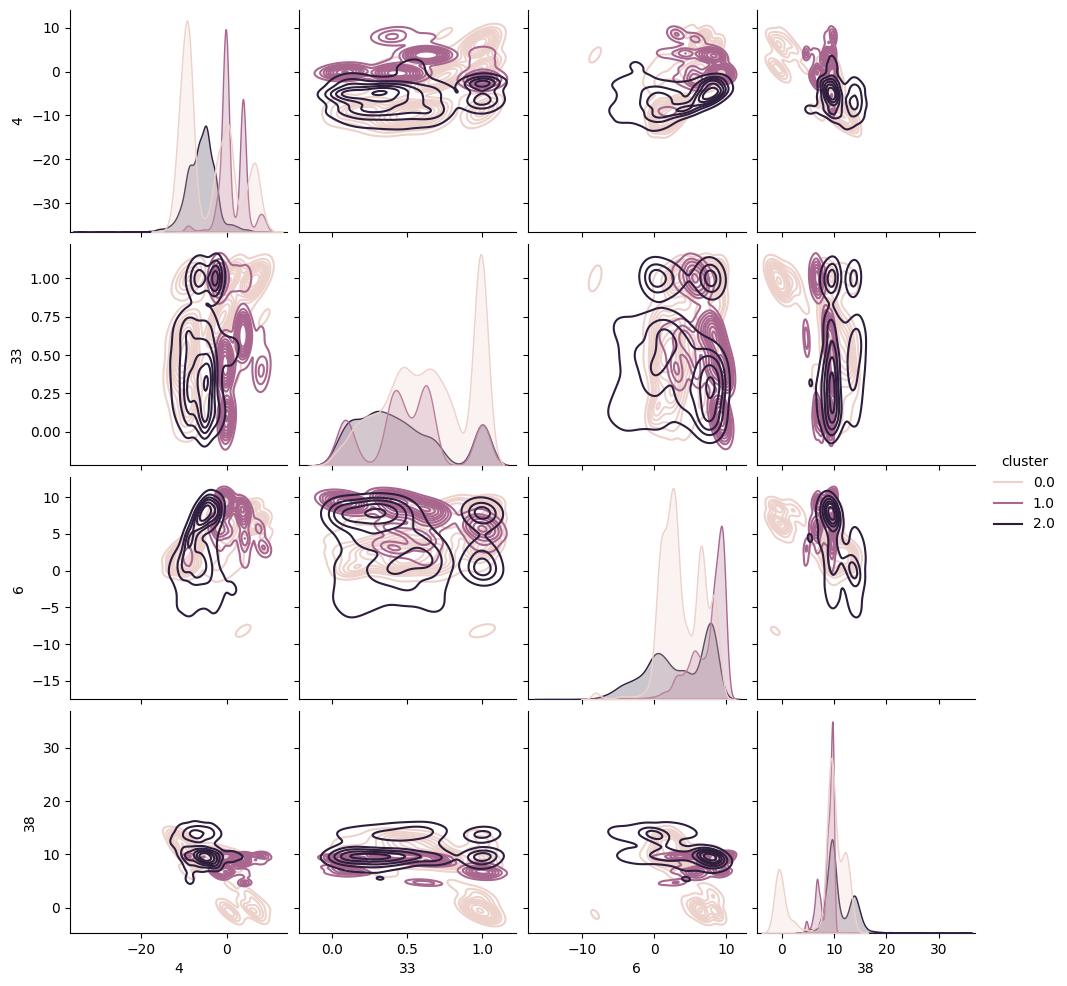

In [7]:
# pair plots of top 4 most important features
selected_columns = ['cluster', 4, 33, 6, 38]
pamap_copy = pamap[selected_columns].copy()
sns.pairplot(pamap_copy,hue='cluster',kind='kde') 


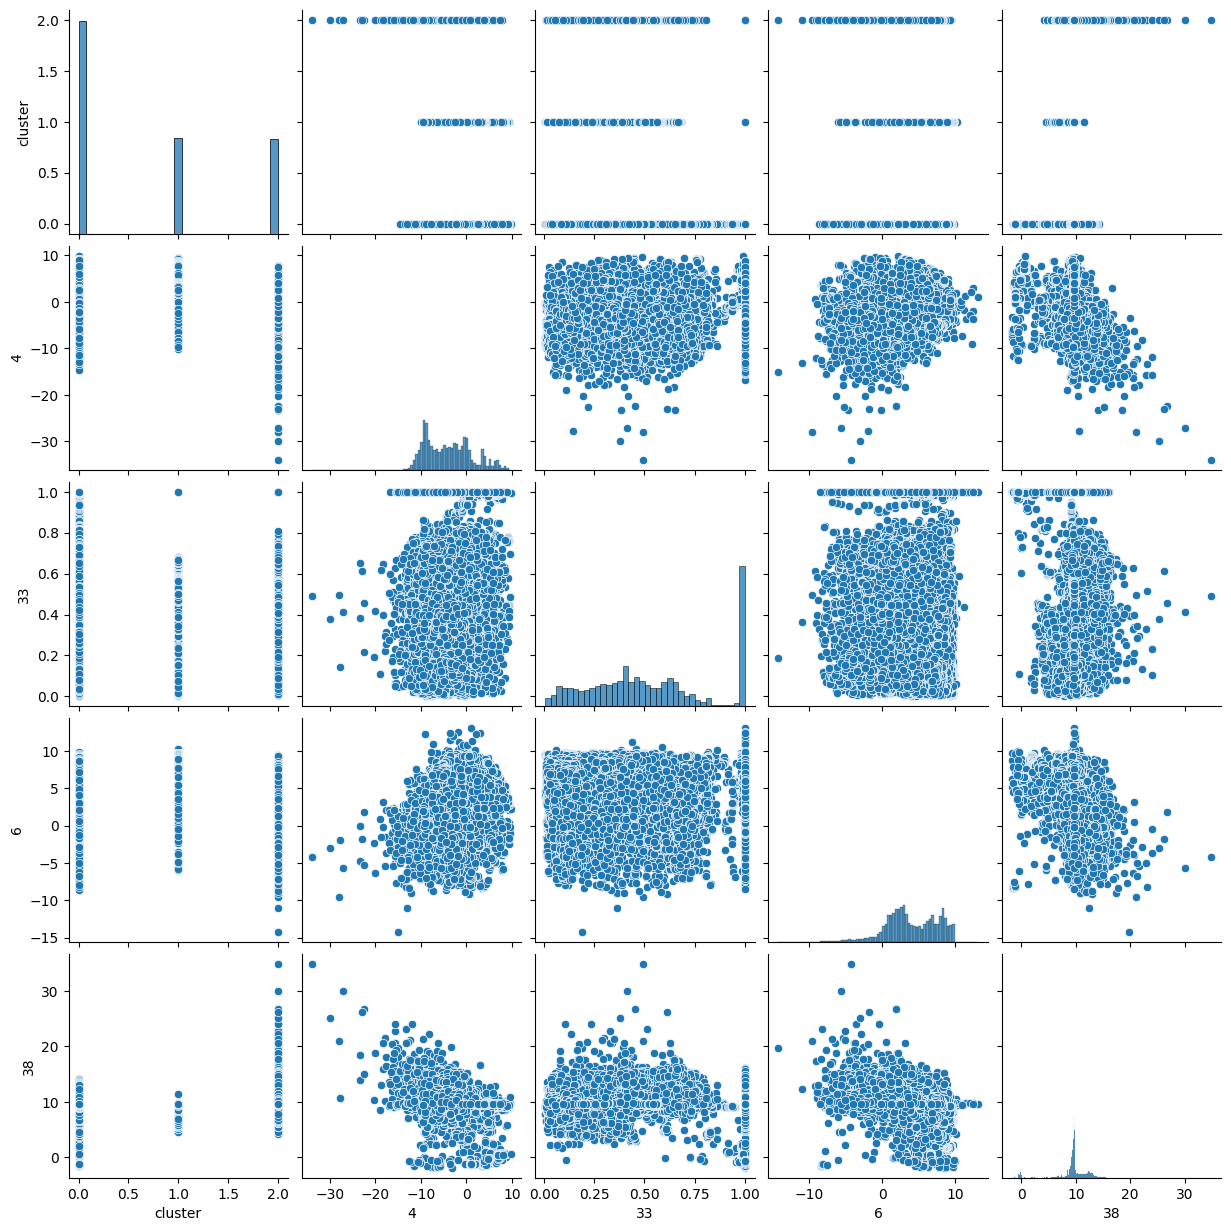

In [8]:
sns.pairplot(pamap_copy)